# 1. Importing the dataset and required libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
car_price_df = pd.read_csv('CarPrice_Assignment.csv')
print('Shape of data -', car_price_df.shape)
car_price_df.head()

Shape of data - (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 2. Understanding the dataframe (EDA)

In [3]:
# get the company name from the CarName which is company + model and dropping CarName column
car_price_df['company'] = car_price_df['CarName'].str.split().str[0].str.lower()
car_price_df.drop(columns='CarName', inplace=True)
car_price_df['company'].value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
maxda           2
vw              2
vokswagen       1
mercury         1
porcshce        1
toyouta         1
Name: company, dtype: int64

#### Observation
* vw, vokswagen and volkswagen are same. 
* toyouta and toyota are same.
* maxda and mazda are same.
* porcshce and porsche are same.

All the above need to be converted to one convention.

In [4]:
# Converting all the above car names to one convention as they represent same company.
car_price_df.loc[car_price_df.company == 'maxda', 'company'] = 'mazda'
car_price_df.loc[car_price_df.company == 'toyouta', 'company'] = 'toyota'
car_price_df.loc[car_price_df.company == 'porcshce', 'company'] = 'porsche'
car_price_df.loc[(car_price_df.company == 'vw') | 
                 (car_price_df.company == 'vokswagen'), 'company'] = 'volkswagen'
car_price_df['company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: company, dtype: int64

In [5]:
# dropping column Car_ID as it is unique no and do not give useful insight
car_price_df.drop(columns='car_ID', inplace=True)
print('Columns=',car_price_df.columns)
print('Shape=',car_price_df.shape)

Columns= Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')
Shape= (205, 25)


In [6]:
car_price_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Finding numerical data
numeric_data = car_price_df.select_dtypes(include = [np.number])

# Finding categorical data
categorical_data = car_price_df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features'.format(car_price_df.shape[1], categorical_data.shape[1]))
print('Categorical features', categorical_data.columns)
print('Numerical features', numeric_data.columns)

There are 25 numerical and 10 categorical features
Categorical features Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'company'],
      dtype='object')
Numerical features Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


### Distribution plots

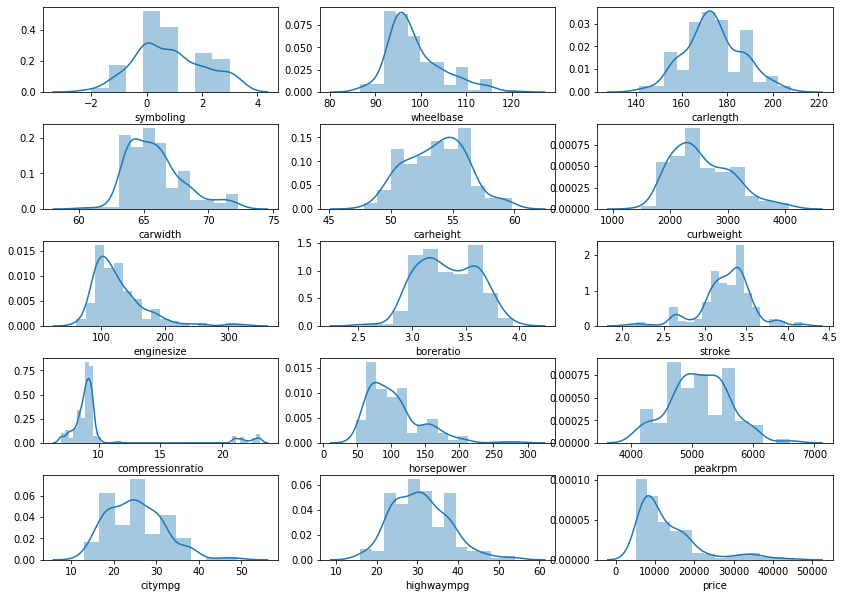

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=3)
fig.set_size_inches(11.7, 8.27)
fig.tight_layout()
for a, col in enumerate(numeric_data.columns):
    sns.distplot(numeric_data[col], ax=axes[a//3,a%3])

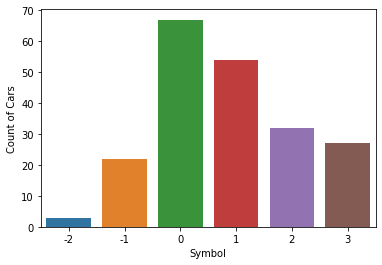

<Figure size 432x288 with 0 Axes>

In [9]:
plt1 = sns.countplot(car_price_df['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

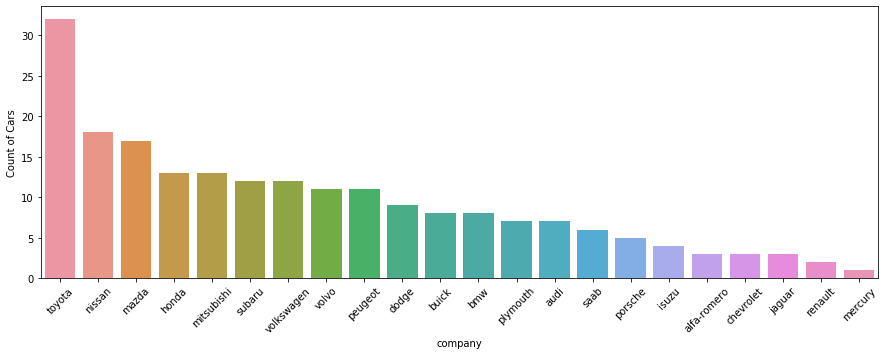

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(car_price_df['company'], order=pd.value_counts(car_price_df['company']).index,)
plt1.set(xlabel = 'company', ylabel= 'Count of Cars')
plt.xticks(rotation = 45)
plt.show()
plt.tight_layout()

### Boxplots

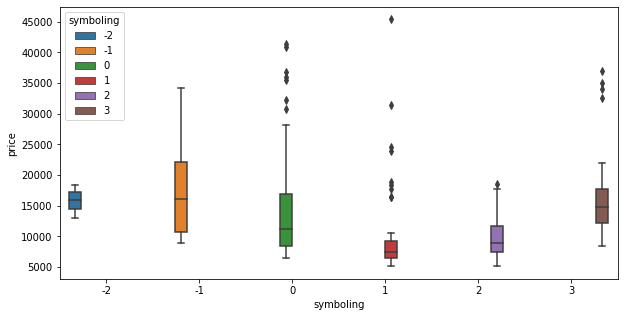

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', x='symboling', hue='symboling',  data=car_price_df)

More safer cars with symboling -1, -2 are generally expensive

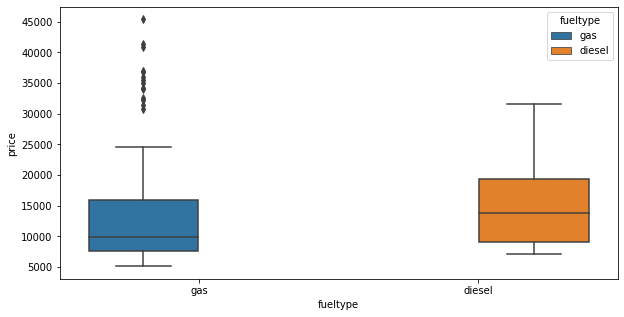

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', x='fueltype', hue='fueltype',  data=car_price_df)

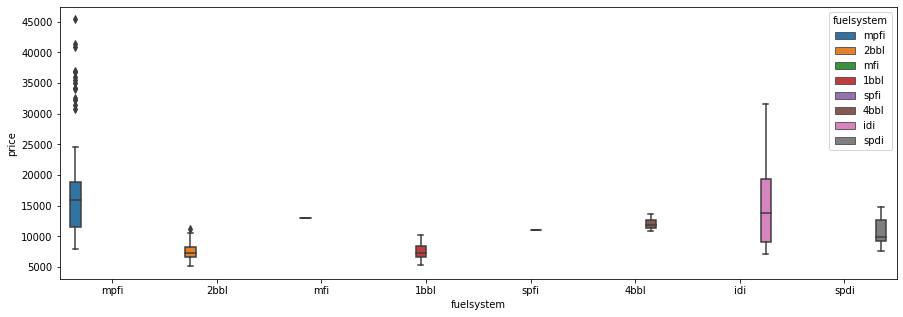

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(y='price', x='fuelsystem', hue='fuelsystem',  data=car_price_df)

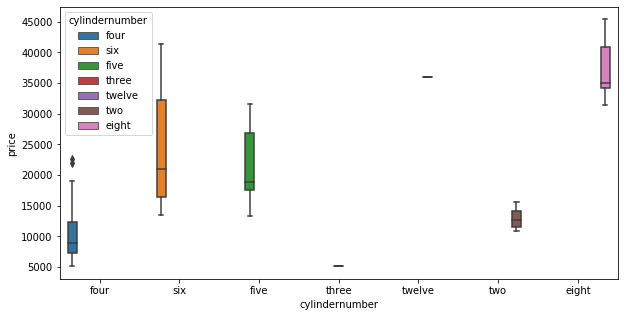

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', x='cylindernumber', hue='cylindernumber',  data=car_price_df)

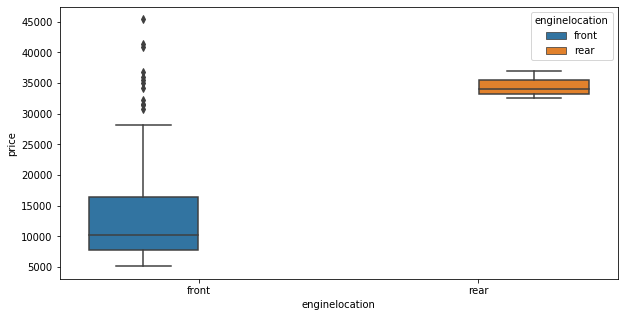

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', x='enginelocation', hue='enginelocation',  data=car_price_df)

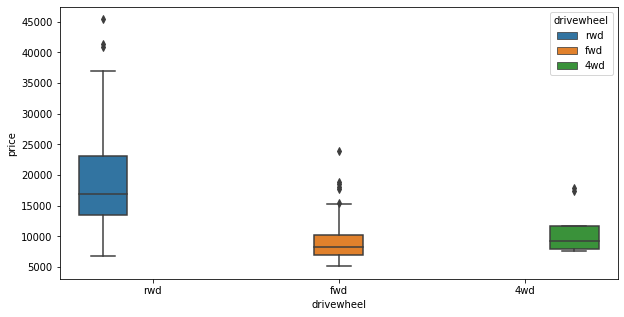

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', x='drivewheel', hue='drivewheel',  data=car_price_df)

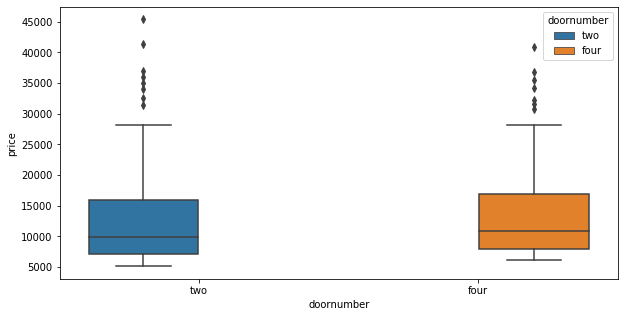

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', x='doornumber', hue='doornumber',  data=car_price_df)

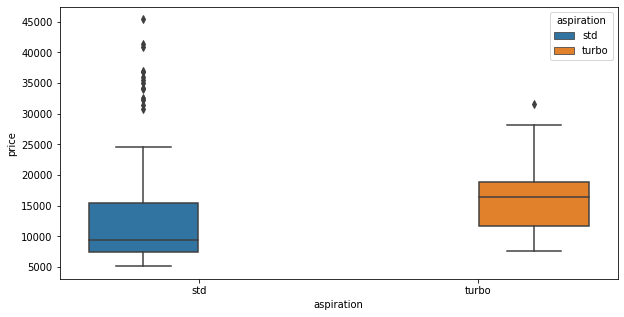

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', x='aspiration', hue='aspiration',  data=car_price_df)

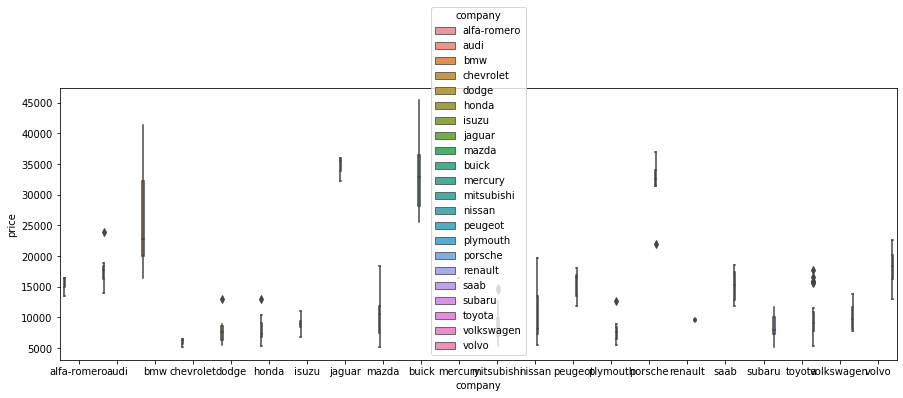

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(y='price', x='company', hue='company',  data=car_price_df)

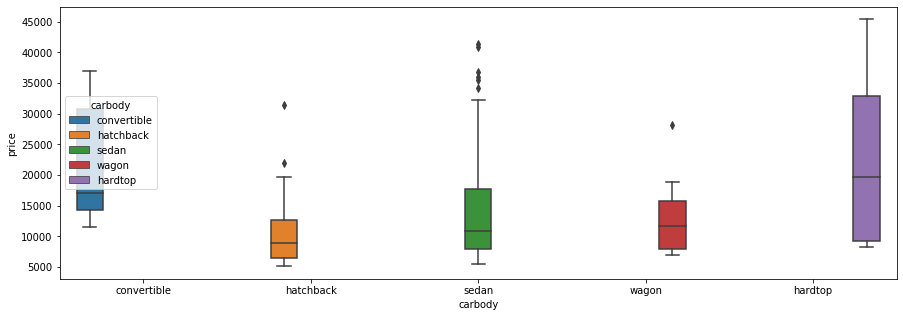

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(y='price', x='carbody', hue='carbody',  data=car_price_df)

### Pair plots

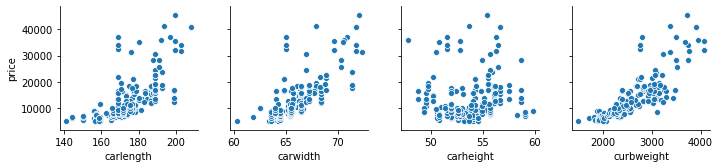

In [21]:
sns.pairplot(data=car_price_df, x_vars=['carlength','carwidth','carheight','curbweight'], 
             y_vars=['price'])

INFERENCE
* carlength, carwidth, curbweight are increasing with increase in price (showing linear relationship with price)

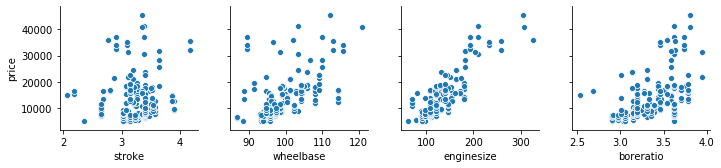

In [22]:
sns.pairplot(data=car_price_df, x_vars=['stroke', 'wheelbase','enginesize', 'boreratio'], 
             y_vars=['price'])

INFERENCE
* price is clearly linearly related to engine size and it may be an important feature while predicting price.
* wheelbase and boreratio also show some linear relationship with price.

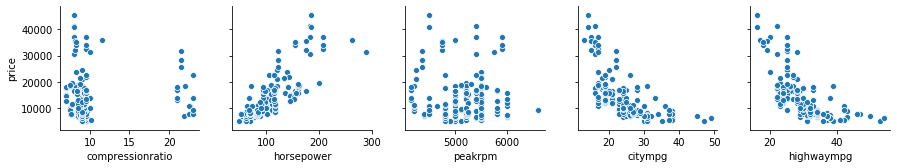

In [23]:
sns.pairplot(data=car_price_df, x_vars=['compressionratio','horsepower', 'peakrpm', 
                                        'citympg', 'highwaympg'], y_vars=['price'])

Observations
* compression ratio and peakrpm are not linearly related with price
* horsepower is linearly related to price
* citympg and highwaypg are inversely linearly related to price. 

### Heatmap

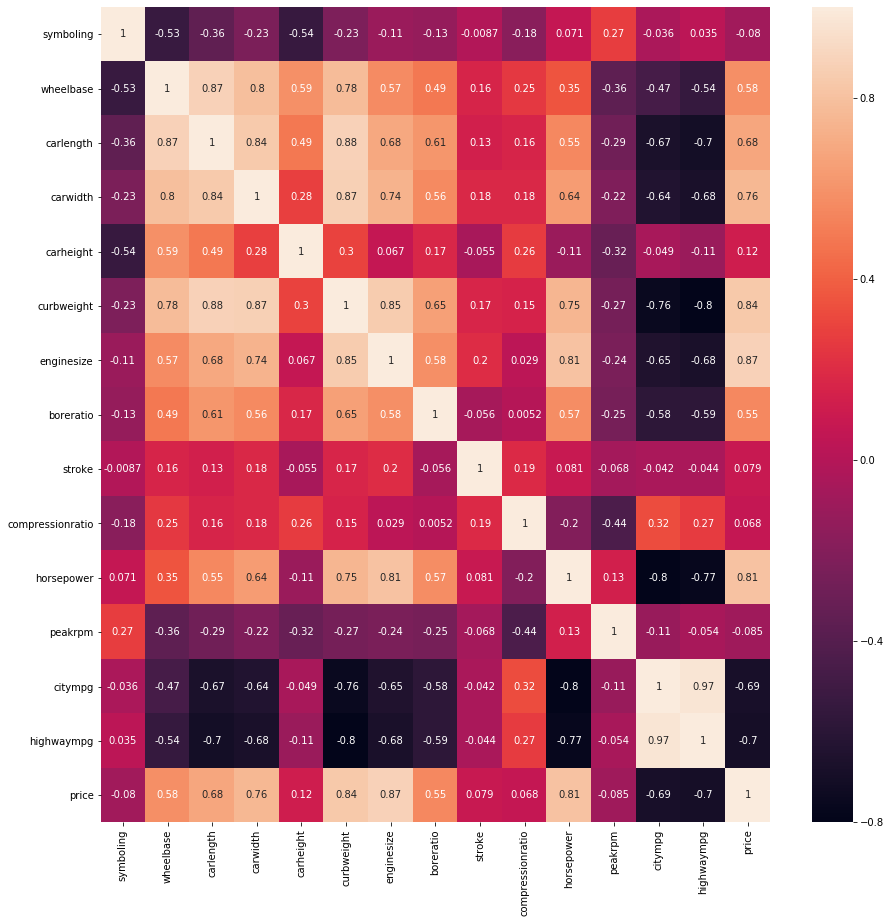

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(car_price_df.corr(), annot=True)

## Converting Categorical columns to numerical

In [25]:
print(car_price_df['fueltype'].value_counts())
print(car_price_df['aspiration'].value_counts())
print(car_price_df['doornumber'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64


In [26]:
car_price_df['fueltype'] = car_price_df['fueltype'].map({'gas':0, 'diesel':1})
car_price_df['aspiration'] = car_price_df['aspiration'].map({'std':0, 'turbo':1})
car_price_df['doornumber'] = car_price_df['doornumber'].map({'four':0, 'two':1})
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,0,0,1,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,0,0,1,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,0,0,1,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,0,0,0,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,0,0,0,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [27]:
car_price_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [28]:
carbody = pd.get_dummies(car_price_df['carbody'], prefix='carbody', drop_first=True)
car_price_df = pd.concat([car_price_df,carbody],axis=1)
car_price_df = car_price_df.drop('carbody', axis=1)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,0,0,1,rwd,front,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.0,alfa-romero,0,0,0,0
1,3,0,0,1,rwd,front,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.0,alfa-romero,0,0,0,0
2,1,0,0,1,rwd,front,94.5,171.2,65.5,52.4,...,154,5000,19,26,16500.0,alfa-romero,0,1,0,0
3,2,0,0,0,fwd,front,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,2,0,0,0,4wd,front,99.4,176.6,66.4,54.3,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [29]:
car_price_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [30]:
drivewheel = pd.get_dummies(car_price_df['drivewheel'], prefix='drivewheel', drop_first=True)
car_price_df = pd.concat([car_price_df, drivewheel], axis=1)
car_price_df = car_price_df.drop('drivewheel', axis=1)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,citympg,highwaympg,price,company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,3,0,0,1,front,88.6,168.8,64.1,48.8,2548,...,21,27,13495.0,alfa-romero,0,0,0,0,0,1
1,3,0,0,1,front,88.6,168.8,64.1,48.8,2548,...,21,27,16500.0,alfa-romero,0,0,0,0,0,1
2,1,0,0,1,front,94.5,171.2,65.5,52.4,2823,...,19,26,16500.0,alfa-romero,0,1,0,0,0,1
3,2,0,0,0,front,99.8,176.6,66.2,54.3,2337,...,24,30,13950.0,audi,0,0,1,0,1,0
4,2,0,0,0,front,99.4,176.6,66.4,54.3,2824,...,18,22,17450.0,audi,0,0,1,0,0,0


In [31]:
car_price_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

Dropping this column as there is not enough data for rear engine location

In [32]:
car_price_df = car_price_df.drop('enginelocation', axis=1)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,citympg,highwaympg,price,company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,3,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,...,21,27,13495.0,alfa-romero,0,0,0,0,0,1
1,3,0,0,1,88.6,168.8,64.1,48.8,2548,dohc,...,21,27,16500.0,alfa-romero,0,0,0,0,0,1
2,1,0,0,1,94.5,171.2,65.5,52.4,2823,ohcv,...,19,26,16500.0,alfa-romero,0,1,0,0,0,1
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,ohc,...,24,30,13950.0,audi,0,0,1,0,1,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,ohc,...,18,22,17450.0,audi,0,0,1,0,0,0


In [33]:
car_price_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

dropping row with dohcv as engine as when converting to dummy variable it will increase 1 more dimension just because of 1 data point

In [34]:
# dropping row with dohcv as enginetype
car_price_df = car_price_df[car_price_df['enginetype'] != 'dohcv']
# converting enginetype to numerical
enginetype = pd.get_dummies(car_price_df['enginetype'], prefix='enginetype', drop_first=True)
car_price_df = pd.concat([car_price_df, enginetype], axis=1)
car_price_df = car_price_df.drop('enginetype', axis=1)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,0,0,1,88.6,168.8,64.1,48.8,2548,four,...,0,0,0,0,1,0,0,0,0,0
1,3,0,0,1,88.6,168.8,64.1,48.8,2548,four,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,1,94.5,171.2,65.5,52.4,2823,six,...,1,0,0,0,1,0,0,0,1,0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,four,...,0,1,0,1,0,0,1,0,0,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,five,...,0,1,0,0,0,0,1,0,0,0


In [35]:
car_price_df['cylindernumber'].value_counts()

four      159
six        24
five       11
two         4
eight       4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [36]:
# Dropping three and twelve cylndernumber as there are only data point in each category
car_price_df = car_price_df[(car_price_df['cylindernumber'] != 'three') & 
                           (car_price_df['cylindernumber'] != 'twelve')]
# converting cylindernumber to numerical
cylindernumber = pd.get_dummies(car_price_df['cylindernumber'], prefix='cylindernumber', drop_first=True)
car_price_df = pd.concat([car_price_df, cylindernumber], axis=1)
car_price_df = car_price_df.drop('cylindernumber', axis=1)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two
0,3,0,0,1,88.6,168.8,64.1,48.8,2548,130,...,1,0,0,0,0,0,0,1,0,0
1,3,0,0,1,88.6,168.8,64.1,48.8,2548,130,...,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,...,1,0,0,0,1,0,0,0,1,0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,1,0,0,0,0,1,0,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,1,0,0,0,1,0,0,0


In [37]:
car_price_df['fuelsystem'].value_counts()

mpfi    92
2bbl    65
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [38]:
# Dropping mfi, spfi fuelsystem as there are only data point in each category
car_price_df = car_price_df[(car_price_df['fuelsystem'] != 'mfi') & 
                           (car_price_df['fuelsystem'] != 'spfi')]
# converting fuelsystem to numerical
fuelsystem = pd.get_dummies(car_price_df['fuelsystem'], prefix='fuelsystem', drop_first=True)
car_price_df = pd.concat([car_price_df, fuelsystem], axis=1)
car_price_df = car_price_df.drop('fuelsystem', axis=1)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
0,3,0,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,1,0
1,3,0,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,1,0,0,0,0,1,0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,1,0,0,0,0,0,1,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,0,1,0,0,0,0,0,0,1,0


In [39]:
car_price_df['company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           8
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
alfa-romero     3
isuzu           3
chevrolet       2
jaguar          2
renault         2
mercury         1
Name: company, dtype: int64

In [40]:
# Dropping mercury company as there is only one data point in each category
car_price_df = car_price_df[car_price_df['company'] != 'mercury']
# converting fuelsystem to numerical
company = pd.get_dummies(car_price_df['company'], prefix='company', drop_first=True)
car_price_df = pd.concat([car_price_df, company], axis=1)
car_price_df = car_price_df.drop('company', axis=1)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,3,0,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,0,0


# 3. Preparing X and y

In [41]:
X = car_price_df.drop('price', axis=1)
y = car_price_df['price']

print(X.shape)
print(y.shape)

(199, 57)
(199,)


# 4. Splitting data into train and test

In [42]:
df_train, df_test = train_test_split(car_price_df, train_size=0.7, random_state=100)

In [43]:
scaler = MinMaxScaler()
columns = list(df_train.columns)
df_train[columns] = scaler.fit_transform(df_train[columns])
df_train.head()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
79,0.6,0.0,1.0,1.0,0.162963,0.138783,0.136842,0.181818,0.138179,0.119658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.0,0.0,0.0,0.414815,0.505703,0.389474,0.500000,0.224316,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,1.0,0.0,0.0,1.0,0.218519,0.298479,0.157895,0.236364,0.172275,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27,0.6,0.0,1.0,1.0,0.188889,0.138783,0.136842,0.163636,0.158816,0.119658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.6,0.0,0.0,1.0,0.218519,0.296578,0.136842,0.409091,0.085689,0.115385,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
y_train = df_train.pop('price')
X_train = df_train

# 5. Performing Linear Regression

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 12)
rfe = rfe.fit(X_train, y_train)

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_four',
       'cylindernumber_two', 'company_bmw', 'company_porsche',
       'company_subaru'],
      dtype='object')

In [47]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     126.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.16e-63
Time:                        13:05:59   Log-Likelihood:                 200.50
No. Observations:                 139   AIC:                            -377.0
Df Residuals:                     127   BIC:                            -341.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0186    

In [48]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
7,enginetype_rotor,inf
9,cylindernumber_two,inf
0,const,46.48
6,enginetype_ohcf,20.66
12,company_subaru,18.98
3,enginesize,9.22
2,curbweight,7.77
8,cylindernumber_four,5.71
4,boreratio,5.46
1,carwidth,4.81


In [49]:
X_train_new1 = X_train_rfe.drop(['enginetype_rotor'], axis = 1)
X_train_lm = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     126.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.16e-63
Time:                        13:05:59   Log-Likelihood:                 200.50
No. Observations:                 139   AIC:                            -377.0
Df Residuals:                     127   BIC:                            -341.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0186    

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
0,const,46.48
6,enginetype_ohcf,20.66
11,company_subaru,18.98
3,enginesize,9.22
2,curbweight,7.77
7,cylindernumber_four,5.71
4,boreratio,5.46
1,carwidth,4.81
10,company_porsche,3.33
8,cylindernumber_two,2.37


In [51]:
X_train_new2 = X_train_new1.drop(['enginetype_ohcf'], axis = 1)
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     129.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.81e-62
Time:                        13:05:59   Log-Likelihood:                 195.63
No. Observations:                 139   AIC:                            -369.3
Df Residuals:                     128   BIC:                            -337.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0083    

In [52]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
0,const,43.44
3,enginesize,9.19
2,curbweight,7.77
6,cylindernumber_four,5.48
4,boreratio,5.43
1,carwidth,4.44
7,cylindernumber_two,2.35
10,company_subaru,2.32
5,stroke,1.93
9,company_porsche,1.56


In [53]:
X_train_new3 = X_train_new2.drop(['company_subaru'], axis = 1)
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     145.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.95e-63
Time:                        13:05:59   Log-Likelihood:                 195.57
No. Observations:                 139   AIC:                            -371.1
Df Residuals:                     129   BIC:                            -341.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0036    

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
0,const,36.23
3,enginesize,8.95
2,curbweight,7.46
6,cylindernumber_four,4.89
1,carwidth,4.35
4,boreratio,3.80
7,cylindernumber_two,2.18
5,stroke,1.62
9,company_porsche,1.32
8,company_bmw,1.22


In [55]:
X_train_new4 = X_train_new3.drop(['cylindernumber_four'], axis = 1)
X_train_lm = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     162.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.95e-64
Time:                        13:05:59   Log-Likelihood:                 194.90
No. Observations:                 139   AIC:                            -371.8
Df Residuals:                     130   BIC:                            -345.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0218      0

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
0,const,26.41
2,curbweight,7.40
3,enginesize,5.33
1,carwidth,4.20
4,boreratio,2.07
5,stroke,1.40
8,company_porsche,1.25
6,cylindernumber_two,1.15
7,company_bmw,1.13


In [57]:
X_train_new5 = X_train_new4.drop(['curbweight'], axis = 1)
X_train_lm = sm.add_constant(X_train_new5)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     179.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.01e-64
Time:                        13:05:59   Log-Likelihood:                 192.06
No. Observations:                 139   AIC:                            -368.1
Df Residuals:                     131   BIC:                            -344.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0109      0

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
0,const,25.61
2,enginesize,3.66
1,carwidth,2.66
3,boreratio,1.98
4,stroke,1.40
7,company_porsche,1.21
5,cylindernumber_two,1.13
6,company_bmw,1.13


In [59]:
X_train_new6 = X_train_new5.drop(['cylindernumber_two'], axis = 1)
X_train_lm = sm.add_constant(X_train_new6)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     168.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.18e-59
Time:                        13:05:59   Log-Likelihood:                 178.26
No. Observations:                 139   AIC:                            -342.5
Df Residuals:                     132   BIC:                            -322.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0049      0.029     

In [60]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
0,const,25.30
2,enginesize,3.26
1,carwidth,2.56
3,boreratio,1.94
4,stroke,1.37
6,company_porsche,1.21
5,company_bmw,1.13


In [61]:
X_train_new7 = X_train_new6.drop(['stroke'], axis = 1)
X_train_lm = sm.add_constant(X_train_new7)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.76e-60
Time:                        13:05:59   Log-Likelihood:                 176.50
No. Observations:                 139   AIC:                            -341.0
Df Residuals:                     133   BIC:                            -323.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0503      0.016     

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
0,const,7.42
2,enginesize,2.78
1,carwidth,2.56
3,boreratio,1.66
5,company_porsche,1.19
4,company_bmw,1.10


In [63]:
X_train_new8 = X_train_new7.drop(['boreratio'], axis = 1)
X_train_lm = sm.add_constant(X_train_new8)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     242.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.92e-60
Time:                        13:05:59   Log-Likelihood:                 174.58
No. Observations:                 139   AIC:                            -339.2
Df Residuals:                     134   BIC:                            -324.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0724      0.011     

In [64]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
0,const,3.66
2,enginesize,2.65
1,carwidth,2.39
4,company_porsche,1.11
3,company_bmw,1.10


# 6. Coefficient Calculation

In [65]:
lm.params

const             -0.072379
carwidth           0.313883
enginesize         0.633602
company_bmw        0.204473
company_porsche    0.262385
dtype: float64

# 7. Residual Analysis of the train data

In [66]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

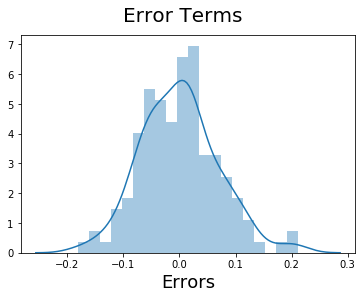

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

# 8. Making predictions using the final model

#### Applying the scaling on the test set 

In [68]:
df_test[columns] = scaler.transform(df_test[columns])
df_test.describe()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.563333,0.133333,0.183333,0.450000,0.377037,0.470311,0.367719,0.443030,0.331128,0.249644,...,0.083333,0.050000,0.033333,0.016667,0.033333,0.033333,0.016667,0.250000,0.033333,0.100000
std,0.274304,0.342803,0.390205,0.501692,0.240888,0.243648,0.212779,0.224491,0.223601,0.165003,...,0.278718,0.219784,0.181020,0.129099,0.181020,0.181020,0.129099,0.436667,0.181020,0.302532
min,0.000000,0.000000,0.000000,0.000000,-0.074074,-0.102662,-0.073684,0.000000,-0.055630,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.218519,0.348859,0.200000,0.281818,0.177322,0.119658,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,0.000000,0.307407,0.463878,0.326316,0.427273,0.275236,0.220085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.515741,0.695817,0.471053,0.627273,0.517497,0.308761,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.196296,1.104563,0.968421,0.900000,0.925527,1.017094,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
y_test = df_test.pop('price')
X_test = df_test

In [70]:
# Creating X_test_m8 dataframe by considering variables from model 8

X_test_m8 = X_test[['carwidth','enginesize','company_bmw','company_porsche']] 
X_test_m8 = sm.add_constant(X_test_m8)

In [71]:
y_pred_m8 = lm.predict(X_test_m8)

# 9. Model Evaluation  

Text(0, 0.5, 'y_pred')

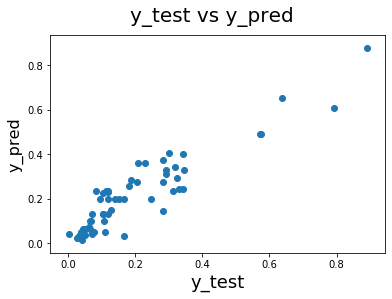

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [73]:
mse = mean_squared_error(y_test, y_pred_m8)
r_squared = r2_score(y_test, y_pred_m8)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005294363374892046
r_square_value : 0.8427275102475231


Text(0, 0.5, 'Price')

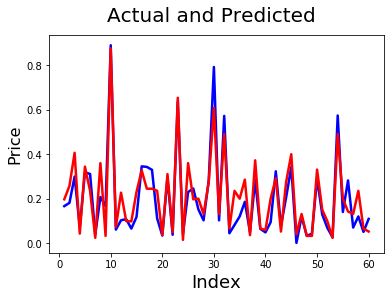

In [74]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m8, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

Text(0, 0.5, 'Actual-Predicted price')

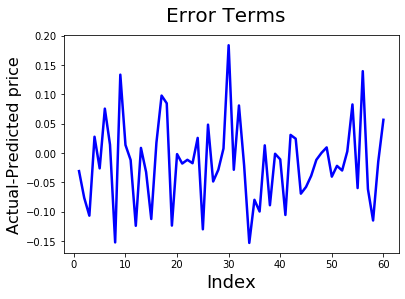

In [75]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_m8, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual-Predicted price', fontsize=16)                # Y-label

We can see that the equation of our best fitted line is:

*price* = (0.63 * *enginesize*) + (0.31 * *carwidth*) + (0.20 * *company_bmw*) + (0.26 * *company_porsche*) - 0.07